In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline
%config InlineBackend.figure_format='retina'

Only run the next cell if you want custom plot output, and you have LaTeX installed

In [2]:
from matplotlib import rc
rc('font', **{'family':'sans-serif',
    'sans-serif':['Helvetica'],
    'monospace': ['Inconsolata'],
    'serif': ['Helvetica']})
rc('text', **{'usetex': True})
rc('text', **{'latex.preamble': '\\usepackage{sfmath}'})

In [3]:
df = pd.read_csv("data/PaulRevereAppD.csv", index_col=0)

In [4]:
# tidy up ugly names and groups
df['names'] = df.index

def fix_names(df):
    """ re-format names into a tidier representation """
    return " ".join(df.split(".")[::-1])

df.names = df.names.apply(fix_names)
df = df.set_index(df.names)
df = df.drop('names', 1)

columns = list(df.columns)
fixed_columns = []
for c in columns:
    fixed_columns.append(" ".join([a for a in re.split(r'([A-Z][a-z]*)', c) if a]))
df.columns = fixed_columns

In [5]:
# form square matrices
people = df.dot(df.T).fillna(0)
groups = df.T.dot(df).fillna(0)

In [6]:
# make graphs and add labels
people_graph = nx.from_numpy_matrix(people.values)
people_graph = nx.relabel_nodes(people_graph, dict(enumerate(people.columns)))
groups_graph = nx.from_numpy_matrix(groups.values)
groups_graph = nx.relabel_nodes(groups_graph, dict(enumerate(groups.columns)))

# get Fruchterman-Reingold positions, tune k to taste
fr_groups = nx.spring_layout(groups_graph, k=5.)
fr_people = nx.spring_layout(people_graph, k=0.3)

# get edge weights
group_weights = [e[2]['weight'] for e in groups_graph.edges(data=True)]
people_weights = [e[2]['weight'] for e in people_graph.edges(data=True)]

people_between = nx.betweenness_centrality(people_graph)
people_eigen = nx.eigenvector_centrality(people_graph)

In [ ]:
# visualise people using Fruchterman-Reingold in order to identify central figures
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(
    111,
    facecolor='w',
    title="The Most Connected Individuals are Immediately Evident",
    frame_on=False)

nx.draw_networkx_nodes(people_graph, fr_people, ax=ax, node_size=10, node_color='#ff8300')
nx.draw_networkx_edges(people_graph, fr_people, ax=ax, width=0.1, edge_color='#009aaf', alpha=0.5)
nx.draw_networkx_labels(people_graph, fr_people, ax=ax, font_size=5, alpha=0.75)
ax.axis('off')
# this size saves at the max width allowed by Github, vary at will
fig.set_size_inches(7.28, 5.25)
plt.savefig(
    'figures/people_gh.png',
    dpi=100,
    tight_layout=True,
    alpha=True)
plt.savefig(
    'figures/people_full.png',
    dpi=300,
    tight_layout=True,
    alpha=True)
plt.show()

<Figure size 432x288 with 0 Axes>

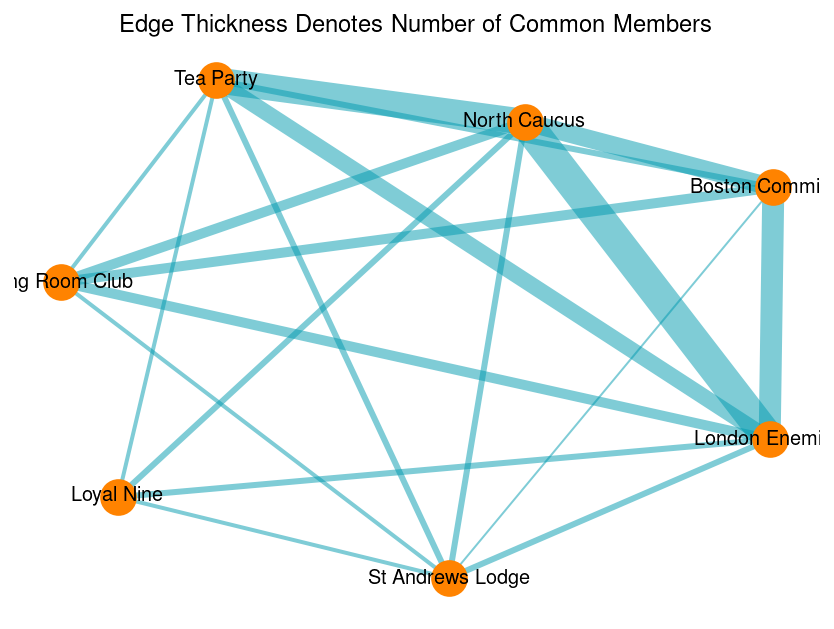

In [7]:
# visualise groups using common members to drive weights
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False, title="Edge Thickness Denotes Number of Common Members")
nx.draw_networkx_nodes(groups_graph, fr_groups, ax=ax, node_color='#ff8300')
nx.draw_networkx_edges(groups_graph, fr_groups, ax=ax, width=group_weights, edge_color='#009aaf', alpha=0.5)

# or use a colour map
# nx.draw_networkx_edges(
#     groups_graph,
#     fr_groups,
#     ax=ax,
#     width=5,
#     edge_cmap=plt.cm.GnBu,
#     edge_vmin=min(group_weights),
#     edge_vmax=max(group_weights),
#     edge_color=group_weights, alpha=1.
# )

nx.draw_networkx_labels(groups_graph, fr_groups, ax=ax, font_size=10, name="Foo")
ax.axis('off')
# this size saves at the max width allowed by Github, vary at will
fig.set_size_inches(7.22, 5.25)
plt.savefig(
    'figures/groups_gh.png',
    dpi=100,
    tight_layout=True,
    alpha=True,
)
plt.savefig(
    'figures/groups_full.png',
    dpi=300,
    tight_layout=True,
    alpha=True,
)
plt.show()

In [11]:
# Show the most connected individuals, sorted by betweenness centrality
for person in sorted(people_between.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("%s: %.3f" % (person[0], person[1]))

Paul Revere: 0.137
Thomas Urann: 0.074
Joseph Warren: 0.071
Samuel Peck: 0.045
Henry Bass: 0.038
Thomas Chase: 0.038
Nathaniel Barber: 0.033
JamesFoster Condy: 0.027
Moses Grant: 0.027
Edward Proctor: 0.027


In [12]:
# Show the most connected individuals, sorted by eigenvector centrality (PageRank)
for person in sorted(people_eigen.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("%s: %.3g" % (person[0], person[1]))

Paul Revere: 0.125
Nathaniel Barber: 0.121
Henry Bass: 0.121
Thomas Chase: 0.121
JamesFoster Condy: 0.12
Moses Grant: 0.12
Edward Proctor: 0.12
Thomas Urann: 0.113
William Molineux: 0.111
Thomas Young: 0.111
